<a href="https://colab.research.google.com/github/Carlosrnes/deep_learning_nova/blob/main/CNN/CNN_multy_food_v0_GoogleColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### GPU

https://colab.research.google.com/notebooks/gpu.ipynb

In [1]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



### How to Load Kaggle Datasets Directly into Google Colab?

https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/ 

In [2]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

# Download data
! kaggle datasets download -d kmader/food41

100% 5.29G/5.30G [00:26<00:00, 207MB/s]
100% 5.30G/5.30G [00:26<00:00, 214MB/s]


### Libraries

In [13]:
import os, shutil
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from IPython.display import Image, display

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers

from tensorflow.keras import optimizers

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.preprocessing import image

###  Get Data

In [3]:
# Get data
import zipfile

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("food41.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [11]:
# How many images in each folder?
import os

# Walk through 10 percent data directory and list number of files
for dirpath, dirnames, filenames in os.walk("images"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 101 directories and 0 images in 'images'.
There are 0 directories and 1000 images in 'images/gyoza'.
There are 0 directories and 1000 images in 'images/waffles'.
There are 0 directories and 1000 images in 'images/beef_carpaccio'.
There are 0 directories and 1000 images in 'images/croque_madame'.
There are 0 directories and 1000 images in 'images/eggs_benedict'.
There are 0 directories and 1000 images in 'images/bibimbap'.
There are 0 directories and 1000 images in 'images/filet_mignon'.
There are 0 directories and 1000 images in 'images/mussels'.
There are 0 directories and 1000 images in 'images/fried_calamari'.
There are 0 directories and 1000 images in 'images/greek_salad'.
There are 0 directories and 1000 images in 'images/bread_pudding'.
There are 0 directories and 1000 images in 'images/falafel'.
There are 0 directories and 1000 images in 'images/ramen'.
There are 0 directories and 1000 images in 'images/sashimi'.
There are 0 directories and 1000 images in 'images/dumpl

In [25]:
# select the directory of the images (divided by class folder) - without data augmentation
data_folder = '/content/images'

list_class = os.listdir(data_folder)
list_class.sort()


print(f'{len(list_class)} Classes of foods.')
print(list_class)

101 Classes of foods.
['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese',

### Data Preprocessing

In [14]:
# Set the seed
tf.random.set_seed(42)

# rescale the Image and split into validation set
datagen = ImageDataGenerator(rescale = 1./255, validation_split = 0.2)

# train set - generation
train_generator = datagen.flow_from_directory(data_folder,
                                         target_size = (150,150),
                                         batch_size = 32,
                                         class_mode = 'categorical',
                                         subset = 'training')

val_generator = datagen.flow_from_directory(data_folder,
                                      target_size = (150,150),
                                      batch_size = 32,
                                      class_mode = 'categorical',
                                      subset = 'validation')


Found 80800 images belonging to 101 classes.
Found 20200 images belonging to 101 classes.


In [27]:
# Sanity Check
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 150, 150, 3)
labels batch shape: (32, 101)


### Building the network

In [15]:
model = models.Sequential()

# Conv 1
# size of the image 150x150 (3 RGB), 32 neurons, (3,3) strides 
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
# MaxPooling 1
model.add(layers.MaxPooling2D((2,2)))

# Conv 2
model.add(layers.Conv2D(64, (3,3), activation='relu'))
# MaxPooling 2
model.add(layers.MaxPooling2D((2,2)))

# Conv 3
model.add(layers.Conv2D(128, (3,3), activation='relu'))
#  MaxPooling 3
model.add(layers.MaxPooling2D((2,2)))

# Conv 4
model.add(layers.Conv2D(128, (3,3), activation='relu'))
#  MaxPooling 4
model.add(layers.MaxPooling2D((2,2)))

# Fully connected NN
model.add(layers.Flatten())
# Dense Layer 1
model.add(layers.Dense(512, activation='relu'))
# Output layer - sigmoid for binary and softmax for multiclass
model.add(layers.Dense(101, activation='softmax'))

In [16]:
# Defining Loss | Optimizer | Metrics
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc']) # for accuracy

### Training the model

In [17]:
history = model.fit(train_generator,
                    steps_per_epoch=25, #depends on the size of the batch and te total images for training (steps_per_epoch * batch_size = size of training set)
                    epochs=30,
                    validation_data=val_generator,
                    validation_steps=7)  #depends on the size of the batch and te total images for validation (validation_steps * batch_size = size of validation set)

# save the model
model.save('food101.h5')

Epoch 1/30
25/25 [==============================] - 45s 2s/step - loss: 4.6223 - acc: 0.0063 - val_loss: 4.6179 - val_acc: 0.0089
Epoch 2/30
25/25 [==============================] - 43s 2s/step - loss: 4.6157 - acc: 0.0113 - val_loss: 4.6132 - val_acc: 0.0134
Epoch 3/30
25/25 [==============================] - 43s 2s/step - loss: 4.6131 - acc: 0.0137 - val_loss: 4.6008 - val_acc: 0.0089
Epoch 4/30
25/25 [==============================] - 43s 2s/step - loss: 4.6122 - acc: 0.0125 - val_loss: 4.6127 - val_acc: 0.0089
Epoch 5/30
25/25 [==============================] - 45s 2s/step - loss: 4.6081 - acc: 0.0088 - val_loss: 4.6011 - val_acc: 0.0089
Epoch 6/30
25/25 [==============================] - 43s 2s/step - loss: 4.6054 - acc: 0.0100 - val_loss: 4.6038 - val_acc: 0.0089
Epoch 7/30
25/25 [==============================] - 43s 2s/step - loss: 4.5917 - acc: 0.0137 - val_loss: 4.5797 - val_acc: 0.0179
Epoch 8/30
25/25 [==============================] - 43s 2s/step - loss: 4.5938 - acc: 0.02

### Plot the results

In [18]:
# Names of the metrics saved on history dictionary

history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [19]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

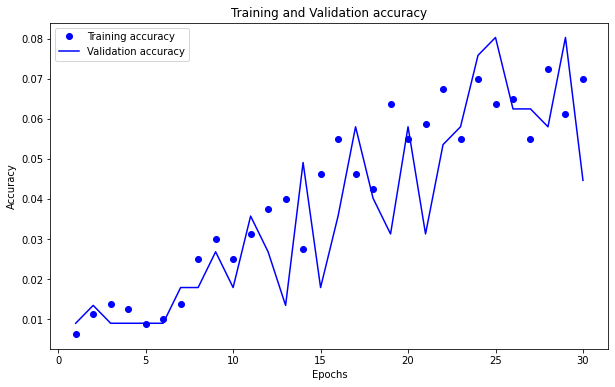

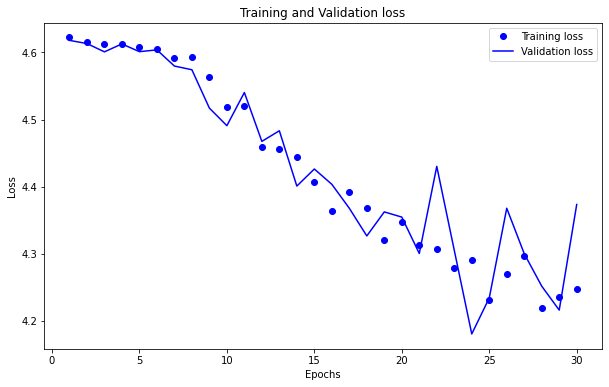

In [20]:
plt.rcParams["figure.figsize"] = (10,6)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Heatmap - class activation heatmap for an image classification model

In [21]:
# The Grad-CAM algorithm

def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [22]:
# function to overlap the heatmap and the real image

def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))

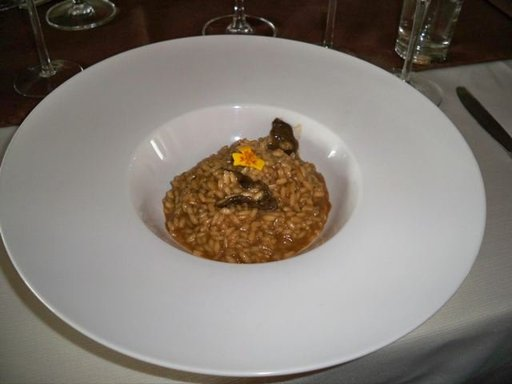

In [23]:
# Test in one image prodiction - define the parameters:

# name form model.summary() of the last CNN layer
last_conv_layer_name = 'conv2d_7'

# check one image sample
# The local path to our target image
img_path = '/content/images/risotto/1820.jpg'

# Size of the training
display(Image(filename=img_path, width=150, height=150))

101
Predicted: clam_chowder


/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:452: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:459: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:464: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:993: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)


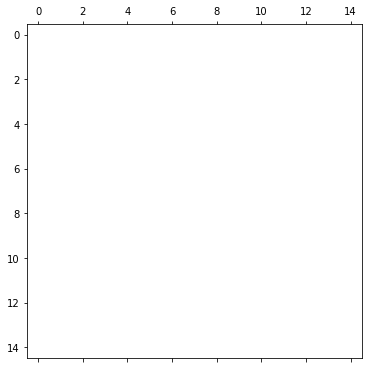

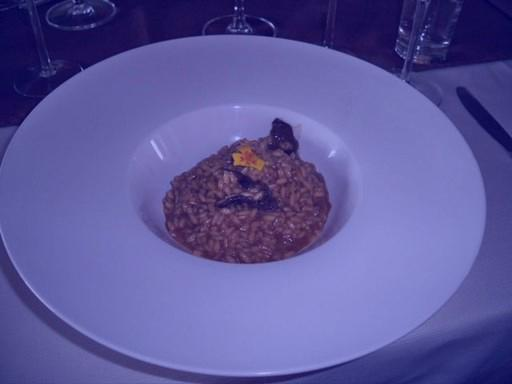

In [28]:
# Display the image

# Prepare image
img_size = (150,150)
img_array = get_img_array(img_path, size=img_size)


# Remove last layer's softmax
# model.layers[-1].activation = None

# Print what the top predicted class is
preds = model.predict(img_array)
print(len(preds[0]))
print("Predicted:", list_class[np.argmax(preds[0])])

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

save_and_display_gradcam(img_path, heatmap)